# Assigment 3
STEP 1: Make and implement data management decisions for the variables you selected.

Data management includes such things as coding out missing data, coding in valid data, recoding variables, creating secondary variables and binning or grouping variables. Not everyone does all of these, but some is required.

STEP 2: Run frequency distributions for your chosen variables and select columns, and possibly rows.

Your output should be interpretable (i.e. organized and labeled).

In [105]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [106]:
data = pd.read_csv("../e.csv", low_memory=False)

# Codes #
## S2AQ5B - How often drank beer last 12 months ##
- 1: Every day
- 2: Nearly every day
- 3: 3 to 4 times a week
- 4: 2 times a week
- 5: Once a week
- 6: 2 to 3 times a month
- 7: Once a month
- 8: 7 to 11 times in the last year
- 9: 3 to 6 times in the last year
- 10: 1 or 2 times in the last year
- 99: Unknown
- BL: NA, did not drink or unknown if drank beer in last 12 months

## S2BQ2E - Number of episodes of alcohol dependence ##

- 1-98: Number of episodes
- 99: Unknown
- BL: NA, lifetime abstainer; did not meet symptom and/or duration criteria for lifetime alcohol dependence

## What we'll do?
Lets consider we want to summarize better the data about the drink frequency in the last 12 months (S2AQ5B). We'll consider, following the codes above:
- 1-3 : High frequency, "high" or just 1
- 4-6 : Mild, or 2;
- 7-10 : Low
- 99 and BL: Discard!

We don't have any problems with NA values, as showed below.

In [107]:
#We don't have NA data
print "Number of NAs in AGE ",
print len(data["AGE"][data["AGE"].isnull()])
print "Number of NAs in S2BQ2E ",
print len(data["S2BQ2E"][data["S2BQ2E"].isnull()])
print "Number of NAs in S2AQ5B ",
print len(data["S2AQ5B"][data["S2AQ5B"].isnull()])

#Discarding the 99 and BL cases
#The BL is displayed as " "
sub_data = data[:][(data["S2AQ5B"] != "99") & (data["S2AQ5B"] != " ")] 
print "Count list for S2AQ5B. Wait for the graph!"
print sub_data["S2AQ5B"].value_counts(sort=False)

Number of NAs in AGE  0
Number of NAs in S2BQ2E  0
Number of NAs in S2AQ5B  0
Count list for S2AQ5B. Wait for the graph!
6     2603
1      836
7     2127
2      645
10    2442
8     1194
3     1535
9     2268
4     2190
5     2451
Name: S2AQ5B, dtype: int64


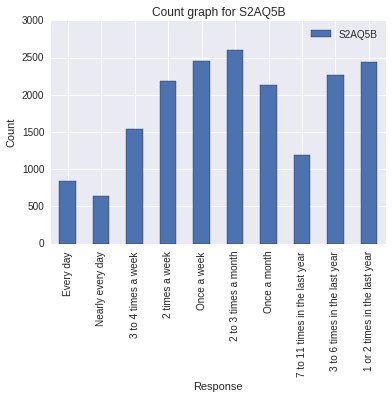

In [108]:
bar = pd.DataFrame(sub_data["S2AQ5B"].convert_objects(convert_numeric=True).value_counts())
bar = bar.sort()
ax = bar.plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Response")
plt.title('Count graph for S2AQ5B')
x_labels = ["Every day","Nearly every day", 
            "3 to 4 times a week", "2 times a week", 
            "Once a week", "2 to 3 times a month", "Once a month", 
            "7 to 11 times in the last year",
            "3 to 6 times in the last year", "1 or 2 times in the last year"]
ax.set_xticklabels(x_labels)
plt.show()

# Creating new data
Now we'll create a new column following what we defined earlier
- 1-3 : High frequency, "high" or just 1
- 4-6 : Mild, or 2;
- 7-10 : Low
- 99 and BL: Discard!

Count list for our new variable Alcohol Profile last 12 monts. Wait for the graph!
1    3016
2    7244
3    8031
Name: alcohol_profile_12m, dtype: int64


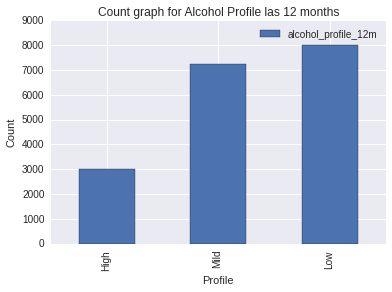

In [109]:
sub_data["alcohol_profile_12m"] = sub_data["S2AQ5B"].apply(lambda x : 1 if int(x) < 4 else 2 if 3 < int(x) < 7 else 3)
print "Count list for our new variable Alcohol Profile last 12 monts. Wait for the graph!"
print sub_data["alcohol_profile_12m"].value_counts(sort=False)

bar = pd.DataFrame(sub_data["alcohol_profile_12m"].convert_objects(convert_numeric=True).value_counts())
bar = bar.sort()
ax = bar.plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Profile")
plt.title('Count graph for Alcohol Profile las 12 months')
x_labels = ["High","Mild","Low"]
ax.set_xticklabels(x_labels)
plt.show()

# Combining two variables
Lets combine alcohol comsuption with dependence episodes. First, we do the same transformation for dependence.

In [110]:
sub_data = sub_data[:][(data["S2BQ2E"] != "99") & (data["S2BQ2E"] != " ")] 
#print "Count list for S2BQ2E"
#print sub_data["S2BQ2E"].value_counts(sort=False)

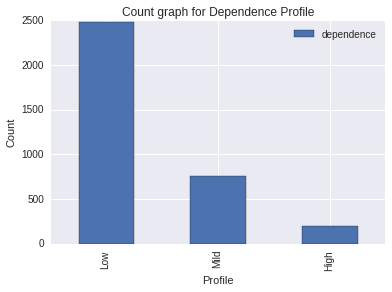

In [111]:
sub_data["dependence"] = sub_data["S2BQ2E"].apply(lambda x : 1 if int(x) < 2 else 2 if 1 < int(x) < 5 else 3)
bar = pd.DataFrame(sub_data["dependence"].convert_objects(convert_numeric=True).value_counts())
bar = bar.sort()
ax = bar.plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Profile")
plt.title('Count graph for Dependence Profile')
x_labels = ["Low","Mild","High"]
ax.set_xticklabels(x_labels)
plt.show()

## New variable
Lets say people with high dependence episodes and high consumption are strong candidates for help. People with high consumption and low dependences episodes are denial (because they can measure well how many times they drink, but don't regonize the dependece episodes), the ones with low profile and high dependeces episodes we'll consider as with a "complicated relation" with alcohol. Anyone else will be "inconclusive". 

It's just a combining experience, we're not thinking too serious about the relationships.

Count list for Relation: 
inconclusive        2656
complicated           51
strong_candidate      75
denial               659
Name: relation, dtype: int64


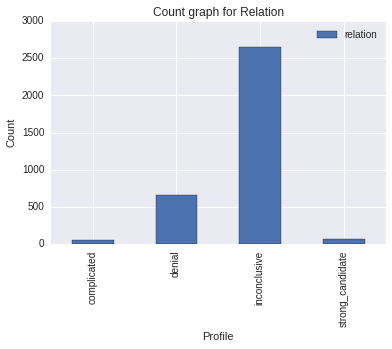

In [132]:
#print len(sub_data[sub_data["dependence"] == 3][sub_data["alcohol_profile_12m"] == 1])
sub_data["relation"] = sub_data.apply(lambda x : "strong_candidate" if x["alcohol_profile_12m"] == 1 and x["dependence"] == 3 else "denial" if x["alcohol_profile_12m"] == 1 and x["dependence"] < 2  else "complicated" if x["alcohol_profile_12m"] == 3 and x["dependence"] == 3 else "inconclusive", axis=1)
print "Count list for Relation: "
print sub_data["relation"].value_counts(sort=False)
bar = pd.DataFrame(sub_data["relation"].convert_objects(convert_numeric=True).value_counts())
bar = bar.sort()
ax = bar.plot(kind='bar')
plt.ylabel("Count")
plt.xlabel("Profile")
plt.title('Count graph for Relation')
plt.show()